#  Problem Statement and Business Context
Finance and Risk Analytics

Problem Statement - FRA Project - Coded
Part A

**Context**

In the realm of modern finance, businesses encounter the perpetual challenge of managing debt obligations effectively to maintain a favorable credit standing and foster sustainable growth. Investors keenly scrutinize companies capable of navigating financial complexities while ensuring stability and profitability. A pivotal instrument in this evaluation process is the balance sheet, which provides a comprehensive overview of a company's assets, liabilities, and shareholder equity, offering insights into its financial health and operational efficiency. In this context, leveraging available financial data, particularly from preceding fiscal periods, becomes imperative for informed decision-making and strategic planning.



**Objective**

A group of venture capitalists want to develop a Financial Health Assessment Tool. With the help of the tool, it endeavors to empower businesses and investors with a robust mechanism for evaluating the financial well-being and creditworthiness of companies. By harnessing machine learning techniques, they aim to analyze historical financial statements and extract pertinent insights to facilitate informed decision-making via the tool. Specifically, they foresee facilitating the following with the help of the tool:


**Debt Management Analysis: **

Identify patterns and trends in debt management practices to assess the ability of businesses to fulfill financial obligations promptly and efficiently, and identify potential cases of default.
Credit Risk Evaluation: Evaluate credit risk exposure by analyzing liquidity ratios, debt-to-equity ratios, and other key financial indicators to ascertain the likelihood of default and inform investment decisions.
They have hired you as a data scientist and provided you with the financial metrics of different companies. The task is to analyze the data provided and develop a predictive model leveraging machine learning techniques to identify whether a given company will be tagged as a defaulter in terms of net worth next year. The predictive model will help the organization anticipate potential challenges with the financial performance of the companies and enable proactive risk mitigation strategies.




**Data Dictionary**

The data consists of financial metrics from the balance sheets of different companies. The detailed data dictionary is given below.


Networth Next Year: Net worth of the customer in the next year

Total assets: Total assets of customer

Net worth: Net worth of the customer of the present year

Total income: Total income of the customer

Change in stock: Difference between the current value of the stock and the
value of stock in the last trading day

Total expenses: Total expenses done by the customer

Profit after tax: Profit after tax deduction

PBDITA: Profit before depreciation, income tax, and amortization

PBT: Profit before tax deduction
Cash profit: Total Cash profit
PBDITA as % of total income: PBDITA / Total income
PBT as % of total income: PBT / Total income

PAT as % of total income: PAT / Total income
Cash profit as % of total income: Cash Profit / Total income
PAT as % of net worth: PAT / Net worth

Sales: Sales done by the customer
Income from financial services: Income from financial services

Other income: Income from other sources

Total capital: Total capital of the customer

Reserves and funds: Total reserves and funds of the customer

Borrowings: Total amount borrowed by the customer
Current liabilities & provisions: current liabilities of the customer

Deferred tax liability: Future income tax customer will pay because of the current transaction

Shareholders funds: Amount of equity in a company which belongs to shareholders

Cumulative retained profits: Total cumulative profit retained by customer
Capital employed: Current asset minus current liabilities

TOL/TNW: Total liabilities of the customer divided by Total net worth
Total term liabilities / tangible net worth: Short + long term liabilities divided by tangible net worth
Contingent liabilities / Net worth (%): Contingent liabilities / Net worth

Contingent liabilities: Liabilities because of uncertain events

Net fixed assets: The purchase price of all fixed assets

Investments: Total invested amount

Current assets: Assets that are expected to be converted to cash within a year
Net working capital: Difference between the current liabilities and current assets

Quick ratio (times): Total cash divided by current liabilities

Current ratio (times): Current assets divided by current liabilities

Debt to equity ratio (times): Total liabilities divided by its shareholder equity

Cash to current liabilities (times): Total liquid cash divided by current liabilities

Cash to average cost of sales per day: Total cash divided by the average cost of the sales

Creditors turnover: Net credit purchase divided by average trade creditors

Debtors turnover: Net credit sales divided by average accounts receivable

Finished goods turnover: Annual sales divided by average inventory

WIP turnover: The cost of goods sold for a period divided by the average inventory for that period

Raw material turnover: Cost of goods sold is divided by the average inventory for the same period

Shares outstanding: Number of issued shares minus the number of shares held in the company

Equity face value: cost of the equity at the time of issuing

EPS: Net income divided by the total number of outstanding share

Adjusted EPS: Adjusted net earnings divided by the weighted average number of common shares outstanding on a diluted basis during the plan year

Total liabilities: Sum of all types of liabilities
PE on BSE: Company's current stock price divided by its earnings per share


**Business Objective:**


To build a predictive model that identifies whether a company is likely to default next year based on its current financials.


**Context:**

Credit default by businesses leads to significant financial risk for lenders and investors. Using financial indicators such as profitability, liabilities, and assets, we aim to classify companies as high-risk (default) or low-risk (non-default) for better credit risk management.


In [ ]:
# Step 1: Import essential libraries
import pandas as pd
import numpy as np

# Step 2: Mount Google Drive (if your file is stored there)
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Load the dataset from your Drive
# Replace the path below with the actual path to your file in Drive
df = pd.read_csv('/content/drive/MyDrive/FRA Coded Project/Comp_Fin_Data.csv')

# Step 4: Check shape
print("Shape of data:", df.shape)

# Step 5: Display column names
print(df.columns.tolist())

# Step 6: Check data types
print(df.dtypes)

# Step 7: Check missing values
print(df.isnull().sum())

# Step 8: Summary statistics
print(df.describe().T)

# Step 9: Create target variable 'default'
df['default'] = df['Networth Next Year'].apply(lambda x: 1 if x < 0 else 0)

# Step 10: Check distribution of 'default'
print(df['default'].value_counts())


Mounted at /content/drive
Shape of data: (4256, 51)
['Num', 'Networth Next Year', 'Total assets', 'Net worth', 'Total income', 'Change in stock', 'Total expenses', 'Profit after tax', 'PBDITA', 'PBT', 'Cash profit', 'PBDITA as % of total income', 'PBT as % of total income', 'PAT as % of total income', 'Cash profit as % of total income', 'PAT as % of net worth', 'Sales', 'Income from fincial services', 'Other income', 'Total capital', 'Reserves and funds', 'Borrowings', 'Current liabilities & provisions', 'Deferred tax liability', 'Shareholders funds', 'Cumulative retained profits', 'Capital employed', 'TOL/TNW', 'Total term liabilities / tangible net worth', 'Contingent liabilities / Net worth (%)', 'Contingent liabilities', 'Net fixed assets', 'Investments', 'Current assets', 'Net working capital', 'Quick ratio (times)', 'Current ratio (times)', 'Debt to equity ratio (times)', 'Cash to current liabilities (times)', 'Cash to average cost of sales per day', 'Creditors turnover', 'Debtor

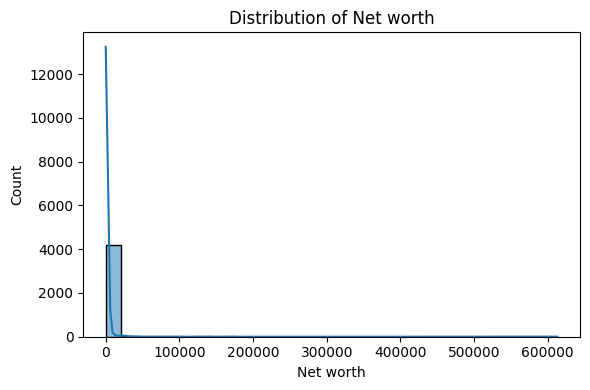

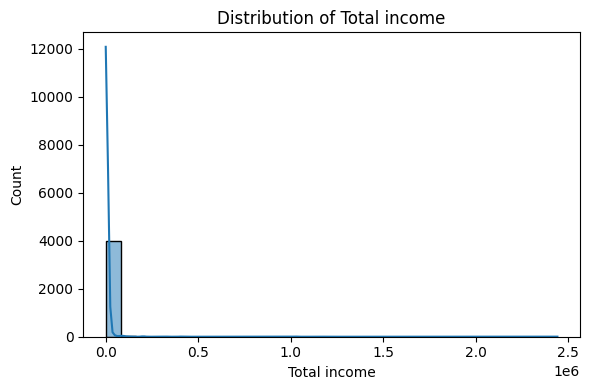

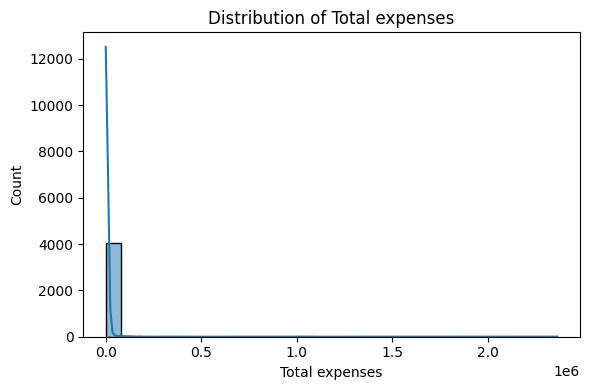

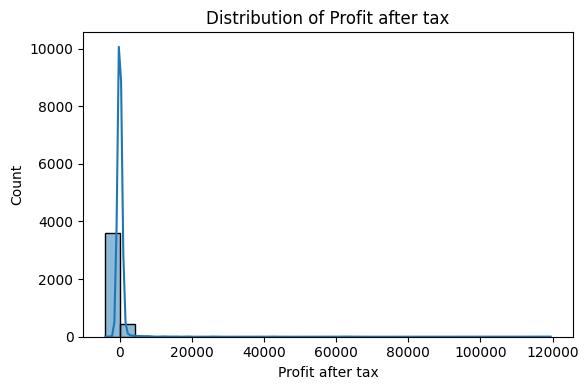

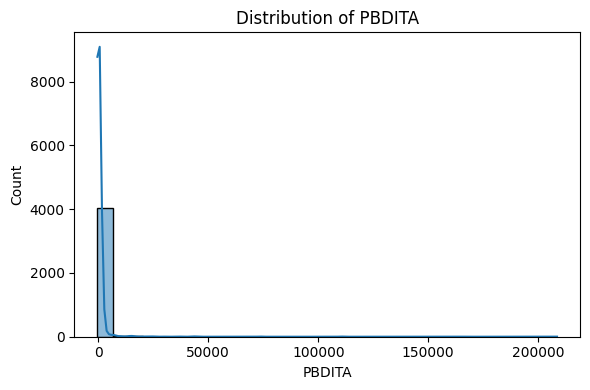

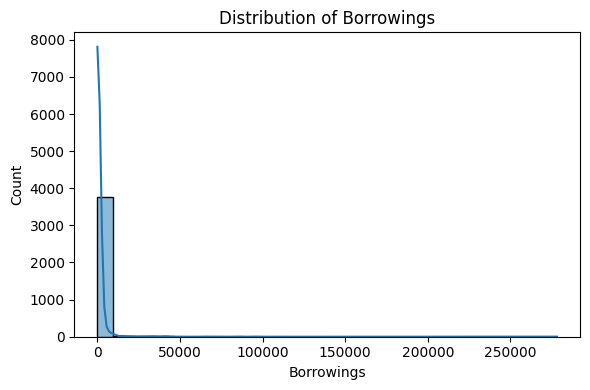

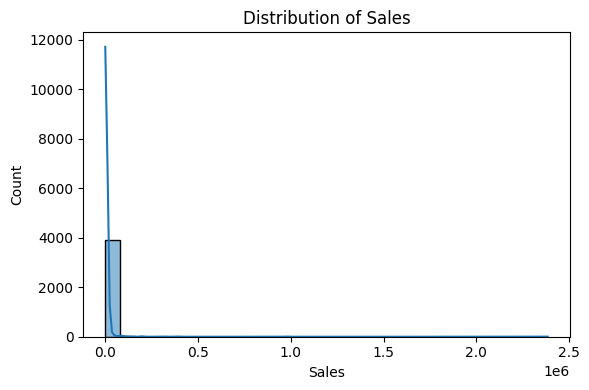

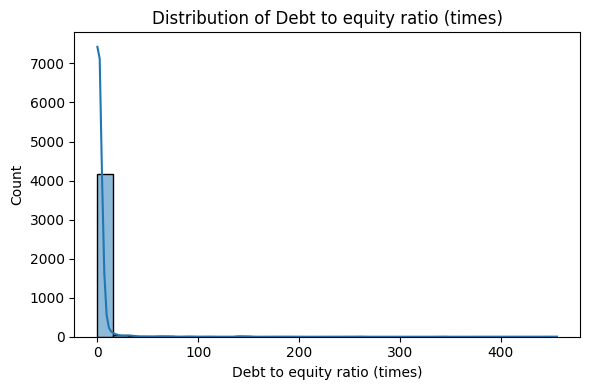

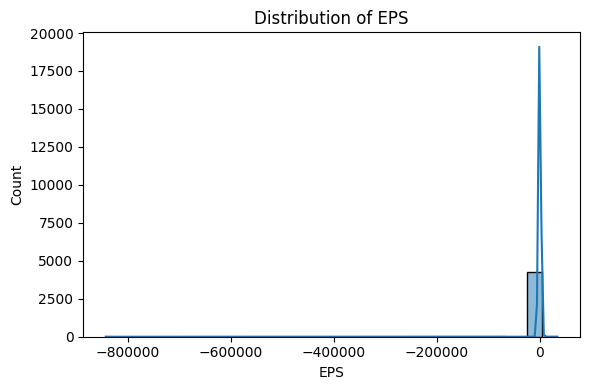

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: To display plots cleanly in Colab
%matplotlib inline

# Select top financial columns for univariate EDA
cols_to_plot = ['Net worth', 'Total income', 'Total expenses', 'Profit after tax',
                'PBDITA', 'Borrowings', 'Sales', 'Debt to equity ratio (times)', 'EPS']

# Plot histograms
for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


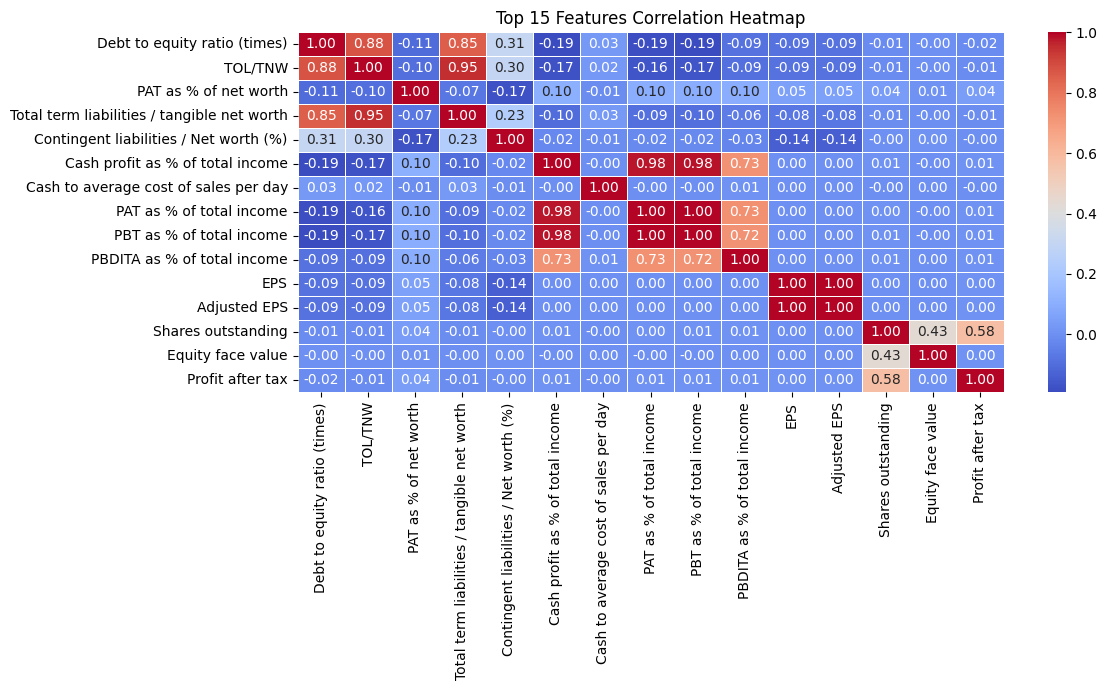

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate correlation of all numeric features with 'default'
corr_with_target = df.corr()['default'].abs().sort_values(ascending=False)

# Step 2: Select top 15 most correlated features (excluding 'default' itself)
top_corr_features = corr_with_target[1:16].index

# Step 3: Create smaller correlation matrix
focused_corr_matrix = df[top_corr_features].corr()

# Step 4: Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(focused_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Top 15 Features Correlation Heatmap')
plt.tight_layout()
plt.show()



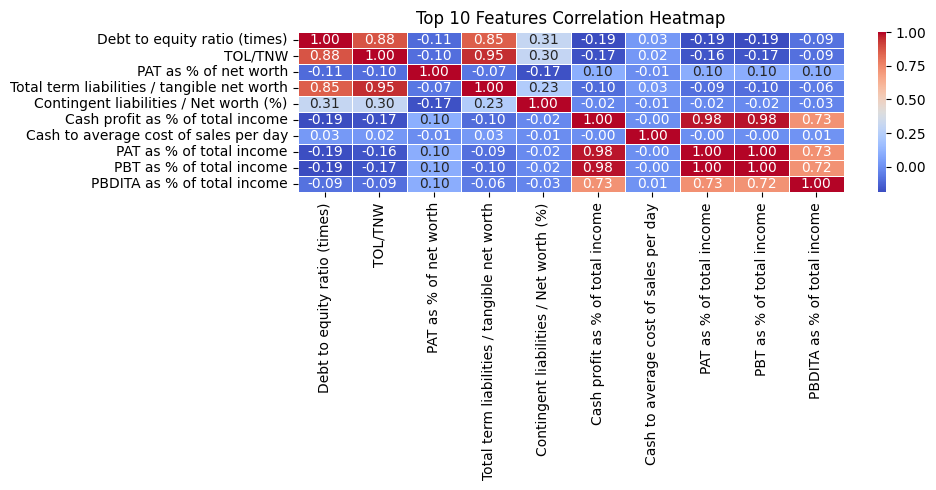

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 most correlated with target (excluding target itself)
top_corr_features = df.corr()['default'].abs().sort_values(ascending=False)[1:11].index

# Correlation matrix of top 10
small_corr_matrix = df[top_corr_features].corr()

# Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(small_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Top 10 Features Correlation Heatmap')
plt.tight_layout()
plt.show()


<ipython-input-5-710022abbe34>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette='Blues_r')


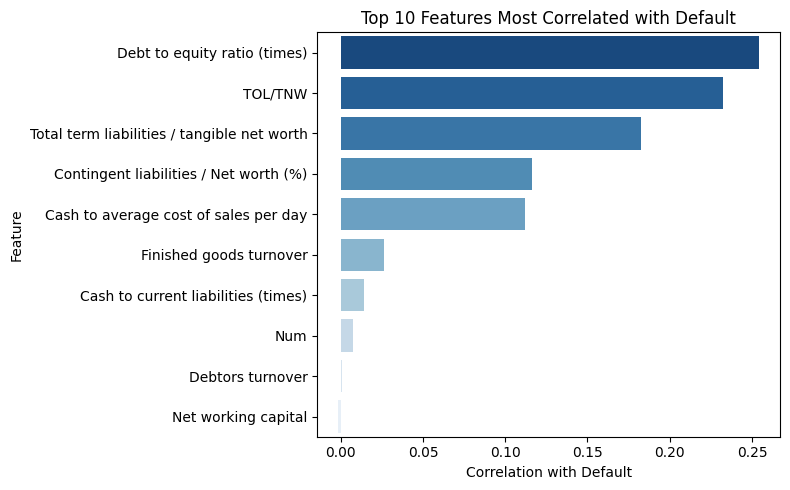

In [ ]:
# Correlation with default only (Top 10)
corr_target = df.corr()['default'].drop('default').sort_values(ascending=False)[:10]

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='Blues_r')
plt.title('Top 10 Features Most Correlated with Default')
plt.xlabel('Correlation with Default')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)


,0
PE on BSE,2627
Investments,1715
Other income,1556
Contingent liabilities,1402
Deferred tax liability,1369
Income from fincial services,1111
Finished goods turnover,874
Equity face value,810
Shares outstanding,810
WIP turnover,764


In [ ]:
# Drop columns with more than 40% missing values
threshold = 0.4 * len(df)
df = df.dropna(thresh=threshold, axis=1)


In [ ]:
# Example: Impute with median
df['Total income'] = df['Total income'].fillna(df['Total income'].median())


<ipython-input-8-6e78535787d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total income'] = df['Total income'].fillna(df['Total income'].median())


In [ ]:
# Step 3: Handle Missing Values

# 3.1 Drop columns with more than 40% missing values
threshold = 0.4 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# 3.2 Impute important numerical columns with median
for col in ['Total income', 'Total expenses', 'Profit after tax', 'PBDITA', 'PBT', 'Cash profit']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# 3.3 Drop any remaining rows with missing values (optional final cleanup)
df = df.dropna()



In [ ]:
# Step 4: Create Target Variable 'default'
df['default'] = df['Networth Next Year'].apply(lambda x: 1 if x < 0 else 0)

# Check distribution
print("Default Distribution:\n", df['default'].value_counts())


Default Distribution:
 default
0    1027
1      15
Name: count, dtype: int64


In [ ]:
# Step 5: Handle Missing Values (Final Version)

# Drop columns with >40% missing values
threshold = 0.4 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Impute important numerical columns with median
for col in ['Total income', 'Total expenses', 'Profit after tax', 'PBDITA', 'PBT', 'Cash profit']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Drop any remaining rows with nulls or infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()


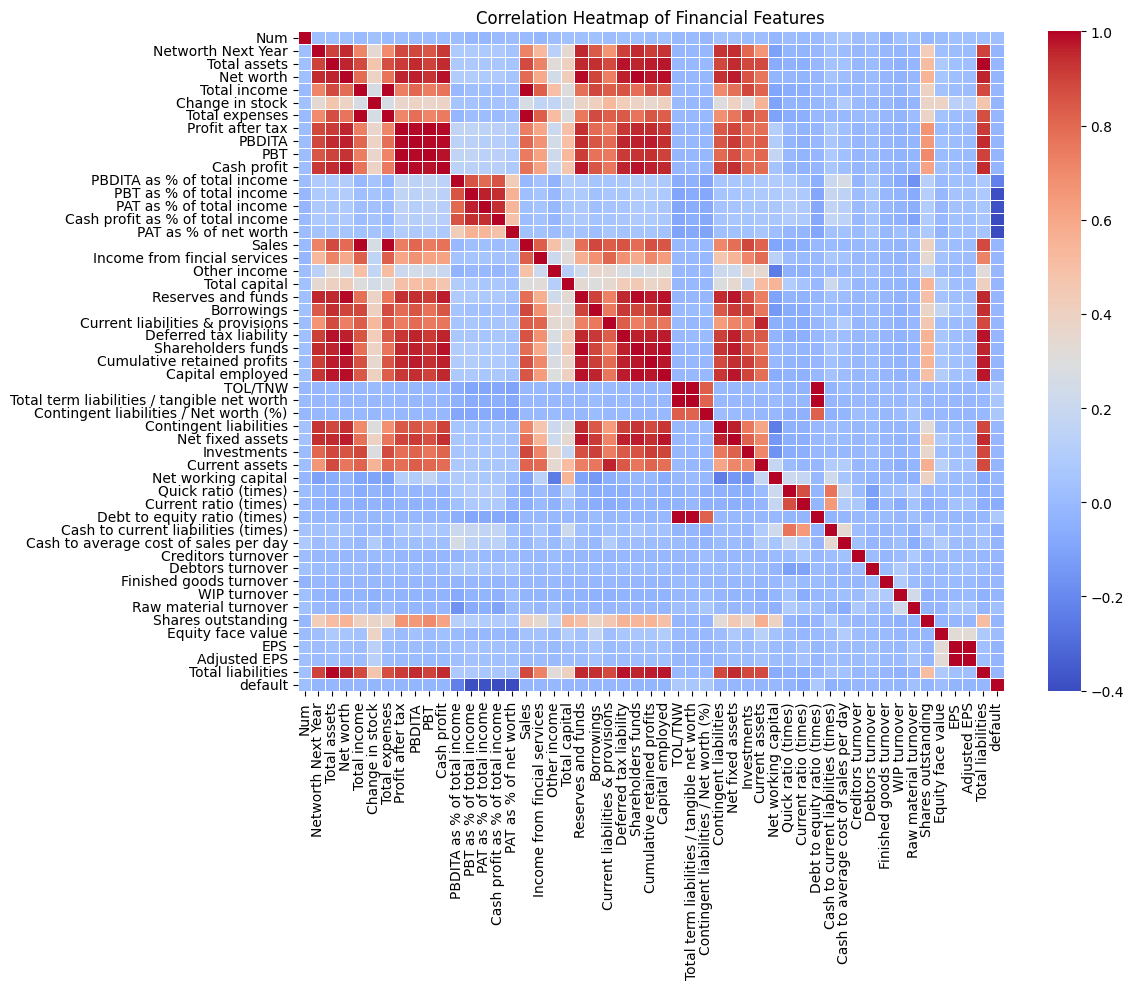

In [ ]:
# Step 6: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Financial Features')
plt.tight_layout()
plt.show()


In [ ]:
# Step 7: VIF Analysis to Remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Drop target variable
X = df.drop('Networth Next Year', axis=1)

# Standardize
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

# Sort VIF
vif_data.sort_values(by="VIF", ascending=False)


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
1,Total assets,inf
3,Total income,inf
5,Total expenses,inf
4,Change in stock,inf
6,Profit after tax,inf
20,Borrowings,inf
48,Total liabilities,inf
25,Capital employed,inf
23,Shareholders funds,inf
15,Sales,4.737440e+05


In [ ]:
safe_features = [
    'Num',
    'PBDITA as % of total income',
    'PAT as % of total income',
    'Cash profit as % of total income',
    'PAT as % of net worth',
    'Contingent liabilities / Net worth (%)',
    'Quick ratio (times)',
    'Current ratio (times)',
    'Shares outstanding',
    'Equity face value',
    'Cash to current liabilities (times)',
    'Cash to average cost of sales per day',
    'Creditors turnover',
    'Debtors turnover',
    'Finished goods turnover',
    'WIP turnover',
    'Raw material turnover',
    'default'  # Target
]



In [ ]:
# Step 9: Train-Test Split & Model Building (from scratch with df_reduced)

# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load Dataset
df = pd.read_csv('/content/drive/MyDrive/FRA Coded Project/Comp_Fin_Data.csv')  # Update path if needed

# 3. Create Target Variable
df['default'] = df['Networth Next Year'].apply(lambda x: 1 if x < 0 else 0)

# 4. Handle Missing Values
threshold = 0.4 * len(df)
df = df.dropna(thresh=threshold, axis=1)
for col in ['Total income', 'Total expenses', 'Profit after tax', 'PBDITA', 'PBT', 'Cash profit']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# 5. Keep Safe Low-VIF Features
safe_features = [
    'Num',
    'PBDITA as % of total income',
    'PAT as % of total income',
    'Cash profit as % of total income',
    'PAT as % of net worth',
    'Contingent liabilities / Net worth (%)',
    'Quick ratio (times)',
    'Current ratio (times)',
    'Shares outstanding',
    'Equity face value',
    'Cash to current liabilities (times)',
    'Cash to average cost of sales per day',
    'Creditors turnover',
    'Debtors turnover',
    'Finished goods turnover',
    'WIP turnover',
    'Raw material turnover',
    'default'
]

df_reduced = df[safe_features]

# 6. Train-Test Split
X = df_reduced.drop('default', axis=1)
y = df_reduced['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# 8. Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

# 9. Evaluation for Logistic Regression
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# 10. Evaluation for Decision Tree
print("\n🔹 Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))



🔹 Logistic Regression
Accuracy: 0.9808612440191388
Confusion Matrix:
 [[205   1]
 [  3   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       206
           1       0.00      0.00      0.00         3

    accuracy                           0.98       209
   macro avg       0.49      0.50      0.50       209
weighted avg       0.97      0.98      0.98       209


🔹 Decision Tree Classifier
Accuracy: 0.9856459330143541
Confusion Matrix:
 [[205   1]
 [  2   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       206
           1       0.50      0.33      0.40         3

    accuracy                           0.99       209
   macro avg       0.75      0.66      0.70       209
weighted avg       0.98      0.99      0.98       209



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logreg = LogisticRegression(max_iter=2000)  # or try solver='liblinear'


In [ ]:
!pip install -U imbalanced-learn

